<a href="https://colab.research.google.com/github/Existanze54/sirius-machine-learning-2024/blob/main/Seminars/Solutions/S3s_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные алгоритмы ML

### Семинар 3. Модели регрессии: kNN, линейная, логистическая. Митрики качества RMSE, MAE, коэффициент корреляции r-Пирсона

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

### Задача 1: Предсказание растворимости белков

В этой задаче предлагается произвести предсказание растворимости различных белков, используя их физико-химические свойства и белковый состав.

In [ ]:
!wget https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/regression/data/solubility_data.csv

--2024-11-16 12:39:22--  https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/regression/data/solubility_data.csv
Resolving data.bioml.ru (data.bioml.ru)... 188.120.231.217
Connecting to data.bioml.ru (data.bioml.ru)|188.120.231.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184108 (180K) [text/csv]
Saving to: ‘solubility_data.csv’

solubility_data.csv 100%[===================>] 179.79K   439KB/s    in 0.4s    

2024-11-16 12:39:23 (439 KB/s) - ‘solubility_data.csv’ saved [184108/184108]



Датасет `solubility_data.csv` загружен за вас, определены `X` и `y`.

In [ ]:
sol = pd.read_csv("./solubility_data.csv", header=0, index_col=0)
sol.head(3)

,solubility,protein_sasa,length,molecular_weight,instability_index,isoelectric_point,helix_fraction,turn_fraction,sheet_fraction,reduced_molar_extinction_coefficient,...,A2,B2,C2,A3,B3,C3,A4,B4,C4,TM
uniprot_id,,,,,,,,,,,,,,,,,,,,,
P32643,78,14538.357720,293,33936.5675,40.259795,5.866034,0.310580,0.208191,0.187713,59360,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0
Q46829,70,19283.018950,470,54516.1438,34.295149,5.655559,0.329787,0.214894,0.225532,111160,...,279,1.1,92.5,0,0.0,0.0,0,0.0,0,0
P65556,19,8407.794332,157,17692.5095,54.505159,4.679577,0.286624,0.165605,0.312102,24980,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0


In [ ]:
X = sol.iloc[:,1:]
y = sol["solubility"]

**Разбейте X и y на тренировочную и тестовую выборки**, как в лекции. Соотношение train/test поставьте равным 4:1.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=777)

**Осуществите стандартизацию признаков в выборке**.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Импортируйте модель регрессии k-NN и обучите ее (`model.fit`)**.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

**Получите предсказание на оставшейся выборке**. Оцените его качество метриками RMSE, MAE.

In [ ]:
y_test_pred = knn.predict(X_test_scaled)
y_train_pred = knn.predict(X_train_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error(y_true=y_train, y_pred=y_train_pred)

592.8083870967743

In [ ]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

792.9449462365591

In [ ]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred) ** 0.5

28.159278155459862

In [ ]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_true=y_test, y_pred=y_test_pred)

28.159278155459862

In [ ]:
mean_absolute_error(y_true=y_test, y_pred=y_test_pred)

24.182795698924732

**Постройте диаграмму рассеяния** предсказываемого значения в зависимости от истинного.

(array([45., 62., 43., 44., 44., 72., 79., 53., 20.,  3.]),
 array([  1. ,  14.2,  27.4,  40.6,  53.8,  67. ,  80.2,  93.4, 106.6,
        119.8, 133. ]),
 <BarContainer object of 10 artists>)

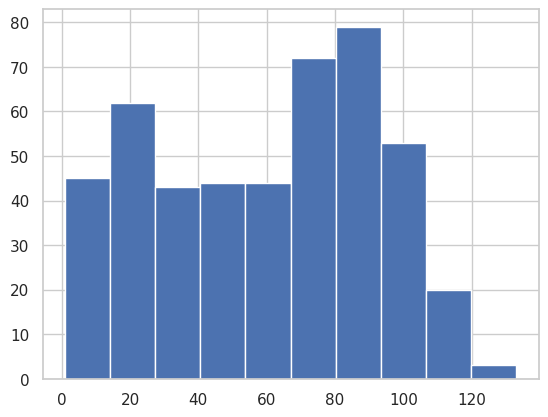

In [ ]:
plt.hist(y)

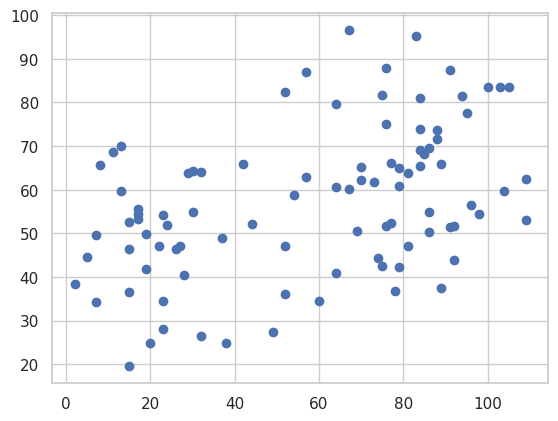

In [ ]:
plt.scatter(y_test, y_test_pred)
# plt.plot(y_test, y_test_pred, 'k.')

Следующая функция строит график зависимости качества на тестовой и тренировочной выборках от параметра модели.\
Измените помеченную строку в функции так, чтобы ее можно было использовать **для построения графика зависимости качества от количества соседей для модели k-NN**.

In [ ]:
from sklearn.metrics import mean_squared_error

def make_qual_chart(X_train, X_test, y_train, y_test, metric=mean_squared_error, init=1, limit=150, step=1):
    train_quals = np.zeros(limit)
    test_quals = np.zeros(limit)
    param_range = np.arange(init, limit + 1, step)

    for ind, value in enumerate(param_range):
        ### CHANGE THE NEXT LINE!
        model = KNeighborsRegressor(value)
        # FIT
        model.fit(X_train, y_train)
        # PREDICT
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        # EVALUATE QUALITY
        train_quals[ind] = metric(y_true=y_train, y_pred=y_train_pred)
        test_quals[ind] = metric(y_true=y_test, y_pred=y_test_pred)

    # baseline = metric(y_true=y_test, y_pred=np.full_like(y_test, y_train.mean()))

    # TRACING CHART
    plt.figure(figsize=(10, 7))
    plt.plot(param_range, train_quals, label="Train")
    plt.plot(param_range, test_quals, label="Test")
    # plt.axhline(baseline, color="k", ls="--", lw=1.5, label="Baseline")
    plt.legend()
    plt.show()
    #return param_range, train_quals, test_quals

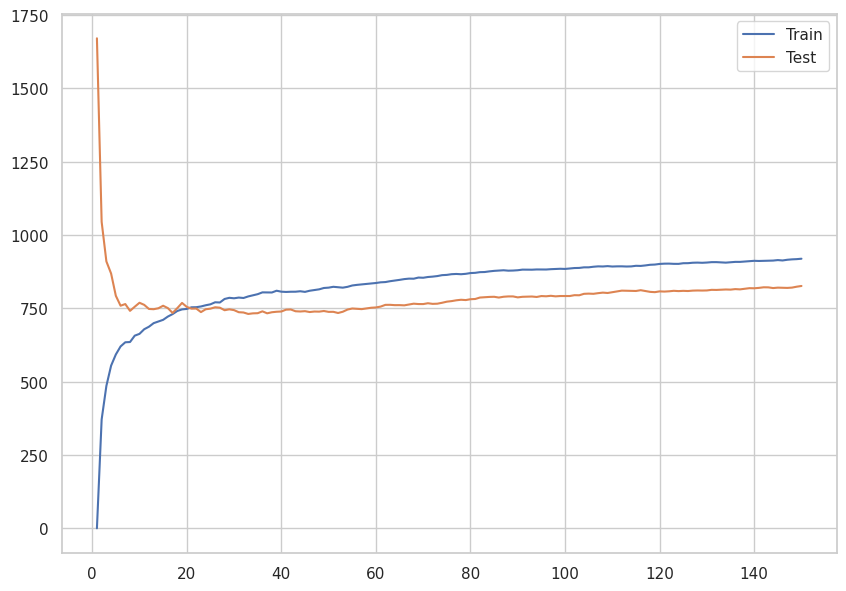

In [ ]:
make_qual_chart(X_train_scaled, X_test_scaled, y_train, y_test)

Сделайте вывод о том, **какое число соседей является оптимальным для данной задачи**. Создайте отдельную модель с оптимальным параметром `n_neighbors` и постройте для нее график зависимости предсказываемого значения от истинного.

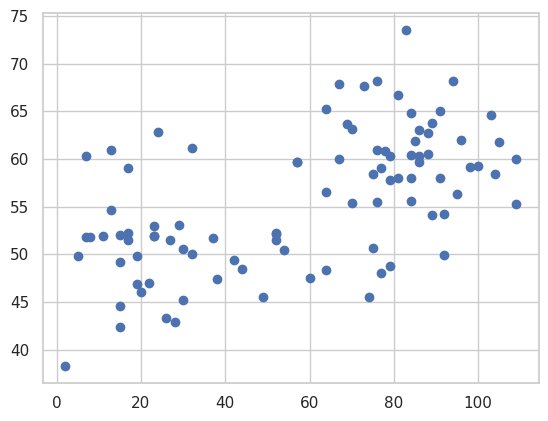

In [ ]:
knn = KNeighborsRegressor(n_neighbors=80)
knn.fit(X_train_scaled, y_train)
y_test_pred = knn.predict(X_test_scaled)

plt.scatter(y_test, y_test_pred)

**Дополнительно**: сравните kNN-regressor с моделью линейной регрессии на тех же данных.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)

In [ ]:
root_mean_squared_error(y_true=y_test, y_pred=y_test_pred)

40.955591593000676

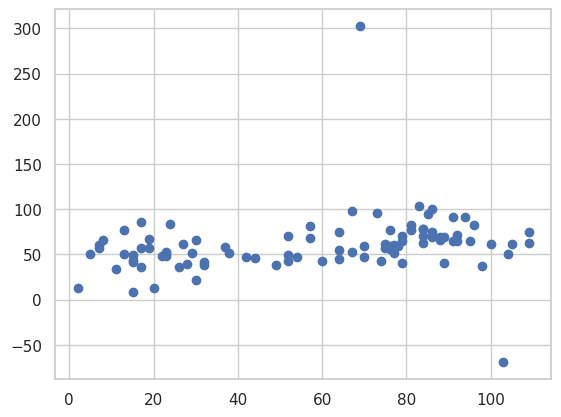

In [ ]:
plt.scatter(y_test, y_test_pred)

### Задача 2: Обучение на геномных эмбеддингах

В этой задаче предлагается произвести предсказание изменения экспрессии гена в зависимости от разных однонуклеотидных замен в регуляторном участке ДНК, основываясь на нейросетевых геномных эмбеддингах этого участка.

In [ ]:
!wget https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/knn/data/tfs_deepsea.csv

--2024-11-16 12:39:39--  https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/knn/data/tfs_deepsea.csv
Resolving data.bioml.ru (data.bioml.ru)... 188.120.231.217
Connecting to data.bioml.ru (data.bioml.ru)|188.120.231.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1098058 (1.0M) [text/csv]
Saving to: ‘tfs_deepsea.csv’

tfs_deepsea.csv     100%[===================>]   1.05M  1.54MB/s    in 0.7s    

2024-11-16 12:39:40 (1.54 MB/s) - ‘tfs_deepsea.csv’ saved [1098058/1098058]



Загрузите датасет `tfs_deepsea.csv`, в качестве `y` теперь используйте колонку `Value`, в качестве `X` те же фичи - все колонки, начиная с девятой.

In [ ]:
tfs = pd.read_csv("tfs_deepsea.csv", header=0)
tfs.head(3)

,Chrom,Pos,Ref,Alt,Value,Confidence,Direction,construction,alt@BRCA1@ds_HepG2_normal,alt@CTCF@ds_HCM_normal,...,ref@GATA3@ds_MCF-7_normal,ref@JunD@ds_H1-hESC_None.1,ref@MafK@ds_K562_normal,ref@NRSF@ds_A549_EtOH_0.02pct,ref@Pol2-4H8@ds_GM12891_normal,ref@Pol2@ds_GM12878_None.2,ref@Pol2@ds_GM12878_None.3,ref@Pol2@ds_GM12878_normal,ref@c-Fos@ds_K562_normal,ref@c-Myc@ds_K562_normal
0,9,104195582,G,C,-0.009418,0.001075,0,ALDOB,0.000056,0.000949,...,0.00934,0.000637,0.082889,0.007880,0.000568,0.000095,0.000287,0.000147,0.000588,0.001214
1,9,104195582,G,T,-0.212088,0.034187,0,ALDOB,0.000051,0.000857,...,0.00934,0.000637,0.082889,0.007880,0.000568,0.000095,0.000287,0.000147,0.000588,0.001214
2,9,104195700,T,A,0.709840,0.364072,1,ALDOB,0.000089,0.001784,...,0.00292,0.001019,0.100890,0.004289,0.000554,0.000142,0.000209,0.000282,0.001091,0.000891


In [ ]:
X = tfs.iloc[:, 8:]
y = tfs["Value"]

**Разбейте X и y на тренировочную и тестовую выборки**, как в лекции. Соотношение train/test поставьте равным 4:1.\
*Подсказка*: воспользуйтесь функцией `train_test_split`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=777)

**Осуществите стандартизацию признаков в выборке**.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Импортируйте модель линейной регрессии и обучите ее на соответствующей части выборки (`model.fit`)**.

In [ ]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_test_pred = linear.predict(X_test_scaled)

**Получите предсказание на оставшейся выборке**. Оцените его качество метриками MSE и RMSE. Насколько хороша модель?

In [ ]:
root_mean_squared_error(y_true=y_test, y_pred=y_test_pred)

0.3044481698074034

In [ ]:
mean_absolute_error(y_true=y_test, y_pred=y_test_pred)

0.20309195555379922

Оцените качество графически и с помощью коэффициента корреляции Пирсона.

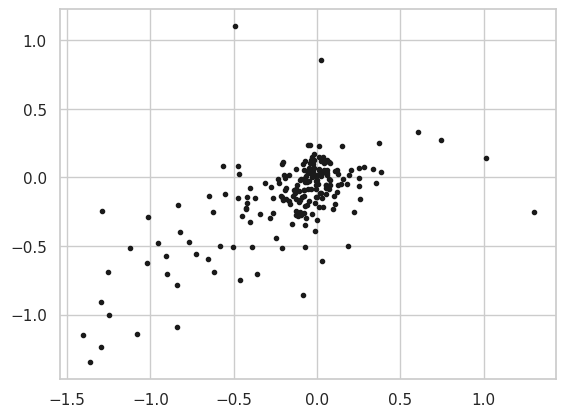

In [ ]:
plt.plot(y_test, y_test_pred, 'k.')

In [ ]:
from scipy.stats import pearsonr
pearsonr(y_test, y_test_pred)

PearsonRResult(statistic=0.6398985462423573, pvalue=1.9806784194610288e-24)

**Воспользуйтесь моделью kNN-regressor**. Оцените ее качество.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor()
reg.fit(X_train_scaled, y_train)
y_test_pred = reg.predict(X_test_scaled)

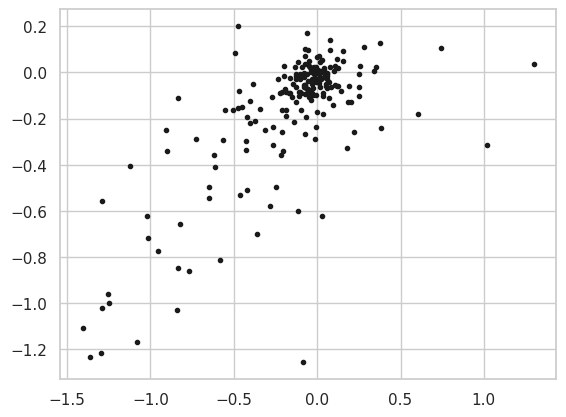

In [ ]:
plt.plot(y_test, y_test_pred, 'k.')

In [ ]:
pearsonr(y_test, y_test_pred)

PearsonRResult(statistic=0.7068545864865953, pvalue=1.3497825958481552e-31)

Разбейте X и y на тренировочную и тестовую выборки, **так, как указано в ячейке ниже**. Повторите все шаги, чтобы определить качество регрессии для линейной и kNN-регрессий.

Биологический смысл указанного разбиения: использовать для обучения один промоторный регион при осуществлении предсказания на другом.

In [ ]:
X_train = X[tfs["construction"] == "ECR11"].values
X_test = X[tfs["construction"] == "ALDOB"].values
y_train = y[tfs["construction"] == "ECR11"].values
y_test = y[tfs["construction"] == "ALDOB"].values

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_test_pred = linear.predict(X_test_scaled)

In [ ]:
root_mean_squared_error(y_true=y_test, y_pred=y_test_pred)

25.603565720559686

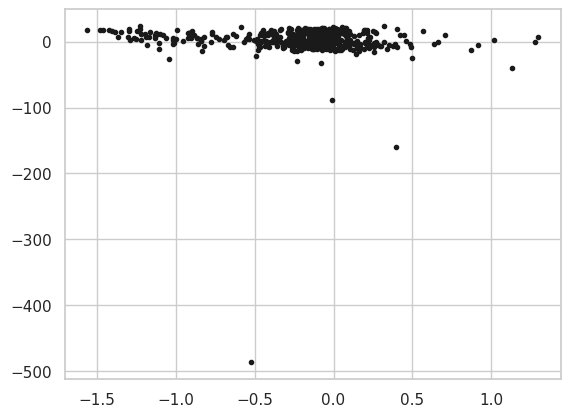

In [ ]:
plt.plot(y_test, y_test_pred, 'k.')

In [ ]:
from scipy.stats import pearsonr
pearsonr(y_test, y_test_pred)

PearsonRResult(statistic=-0.07324465941475196, pvalue=0.10186072194757045)

In [ ]:
reg = KNeighborsRegressor()
reg.fit(X_train_scaled, y_train)
y_test_pred = reg.predict(X_test_scaled)

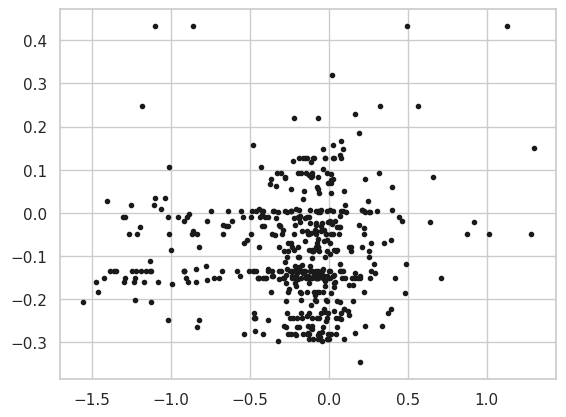

In [ ]:
plt.plot(y_test, y_test_pred, 'k.')

In [ ]:
pearsonr(y_test, y_test_pred)

PearsonRResult(statistic=0.059934835515804294, pvalue=0.18088586808257862)

**Сделайте выводы о пригодности модели линейной регрессии для такого анализа**. Есть ли здесь биологический смысл?

In [ ]:
# линейная регрессия не справилась, kNN тоже